In [1]:
import warnings
warnings.filterwarnings('ignore') # to suppress some matplotlib deprecation warnings
import ast
import math
import numpy as np
import pandas as pd
from simplification.cutil import simplify_coords
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('test.csv')
df.head()

,key_id,countrycode,drawing
0,9000003627287624,DE,"[[[537.8900146484375, 538.9500122070312, 538.9..."
1,9000010688666847,UA,"[[[883, 878, 873, 868, 862, 857, 852, 846, 840..."


In [41]:
img = ast.literal_eval(df['drawing'][1])

In [21]:
def resample(x, y, spacing=1.0):
    output = []
    n = len(x)
    px = x[0]
    py = y[0]
    cumlen = 0
    pcumlen = 0
    offset = 0
    for i in range(1, n):
        cx = x[i]
        cy = y[i]
        dx = cx - px
        dy = cy - py
        curlen = math.sqrt(dx*dx + dy*dy)
        cumlen += curlen
        while offset < cumlen:
            t = (offset - pcumlen) / curlen
            invt = 1 - t
            tx = px * invt + cx * t
            ty = py * invt + cy * t
            output.append((tx, ty))
            offset += spacing
        pcumlen = cumlen
        px = cx
        py = cy
    output.append((x[-1], y[-1]))
    return output
  
def normalize_resample_simplify(strokes, epsilon=1.0, resample_spacing=1.0):
    if len(strokes) == 0:
        raise ValueError('empty image')

    # find min and max
    amin = None
    amax = None
    for x, y, _ in strokes:
        cur_min = [np.min(x), np.min(y)]
        cur_max = [np.max(x), np.max(y)]
        amin = cur_min if amin is None else np.min([amin, cur_min], axis=0)
        amax = cur_max if amax is None else np.max([amax, cur_max], axis=0)

    # drop any drawings that are linear along one axis
    arange = np.array(amax) - np.array(amin)
    if np.min(arange) == 0:
        raise ValueError('bad range of values')

    arange = np.max(arange)
    output = []
    for x, y, _ in strokes:
        xy = np.array([x, y], dtype=float).T
        xy -= amin
        xy *= 255.
        xy /= arange
        resampled = resample(xy[:, 0], xy[:, 1], resample_spacing)
        simplified = simplify_coords(resampled, epsilon)
        xy = np.around(simplified).astype(np.uint8)
        output.append(xy.T.tolist())

    return output

In [48]:
s_img = normalize_resample_simplify(img)

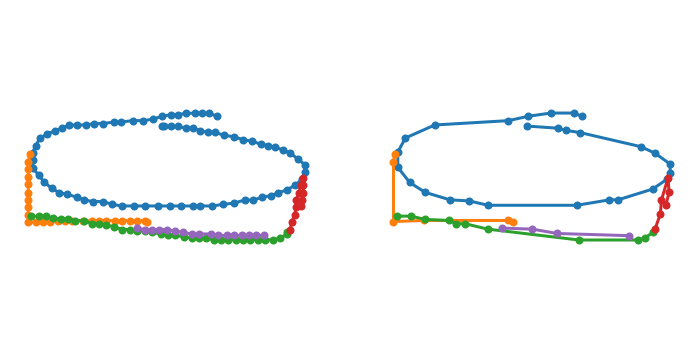

In [49]:
plt.figure(figsize=(6,3))    
for x,y,t in img:
    plt.subplot(1,2,1)
    plt.plot(x, y, marker='.')
    plt.axis('off')

    plt.gca().invert_yaxis()
    plt.axis('equal')

for x,y in s_img:
    plt.subplot(1,2,2)
    plt.plot(x, y, marker='.')
    plt.axis('off')

    plt.gca().invert_yaxis()
    plt.axis('equal')
    
plt.show() 

In [52]:
iimg = np.array(img) 
iimg.shape

(5, 3)

In [65]:
for x, y, t in iimg:
    print(t)

[0, 44, 68, 80, 93, 105, 112, 121, 128, 136, 144, 153, 158, 165, 173, 180, 194, 200, 216, 232, 248, 273, 300, 329, 357, 380, 400, 413, 430, 441, 449, 461, 472, 477, 485, 493, 506, 510, 517, 524, 533, 542, 548, 552, 561, 571, 577, 585, 592, 604, 608, 617, 630, 642, 661, 693, 721, 748, 766, 780, 797, 808, 821, 832, 844, 859, 872, 893, 907, 929, 952, 976, 998, 1041, 1098, 1109]
[1530, 1572, 1609, 1633, 1658, 1676, 1698, 1712, 1732, 2013, 2280, 2317, 2332, 2348, 2361, 2372, 2394, 2408, 2429, 2441, 2461, 2473, 2494, 2521, 2590, 2846]
[3280, 3406, 3433, 3452, 3476, 3495, 3513, 3537, 3564, 3592, 3629, 3664, 3696, 3728, 3752, 3777, 3801, 3828, 3852, 3876, 3908, 3932, 3957, 3988, 4008, 4034, 4060, 4089, 4112, 4144, 4180, 4212, 4244, 4312, 4428, 4538]
[4687, 4792, 4832, 4859, 4872, 4893, 4908, 4932, 5106, 5132, 5158, 5198]
[5562, 5600, 5628, 5646, 5662, 5673, 5690, 5706, 5723, 5733, 5745, 5757, 5769, 5781, 5797, 5823, 5844]


In [64]:
print(img[0])

[[883, 878, 873, 868, 862, 857, 852, 846, 840, 833, 826, 818, 813, 806, 800, 794, 788, 783, 778, 773, 768, 763, 760, 758, 758, 758, 762, 766, 771, 776, 781, 788, 793, 799, 806, 812, 819, 827, 834, 843, 851, 859, 867, 872, 880, 887, 895, 902, 908, 914, 920, 925, 931, 936, 941, 943, 943, 938, 933, 928, 923, 918, 913, 907, 901, 895, 888, 882, 877, 872, 867, 862, 857, 852, 847, 846], [413, 411, 411, 411, 411, 412, 412, 413, 415, 416, 416, 417, 417, 418, 418, 419, 419, 419, 421, 423, 425, 428, 433, 438, 443, 448, 453, 458, 462, 465, 466, 468, 470, 471, 471, 473, 474, 474, 474, 474, 474, 474, 474, 474, 474, 473, 472, 470, 470, 468, 467, 465, 463, 460, 456, 451, 446, 442, 438, 436, 434, 433, 432, 430, 429, 427, 426, 424, 424, 423, 421, 421, 420, 420, 420, 420], [0, 44, 68, 80, 93, 105, 112, 121, 128, 136, 144, 153, 158, 165, 173, 180, 194, 200, 216, 232, 248, 273, 300, 329, 357, 380, 400, 413, 430, 441, 449, 461, 472, 477, 485, 493, 506, 510, 517, 524, 533, 542, 548, 552, 561, 571, 577, 585, 

In [69]:
test = [[[10, 30, 30, 10, 10], [10, 10, 30, 30, 10], [0, 4, 9, 16, 18]], [[0, 50, 50, 0, 0], [0, 0, 50, 50, 0], [25, 30, 35, 40, 42]]]
s_test = normalize_resample_simplify(test)

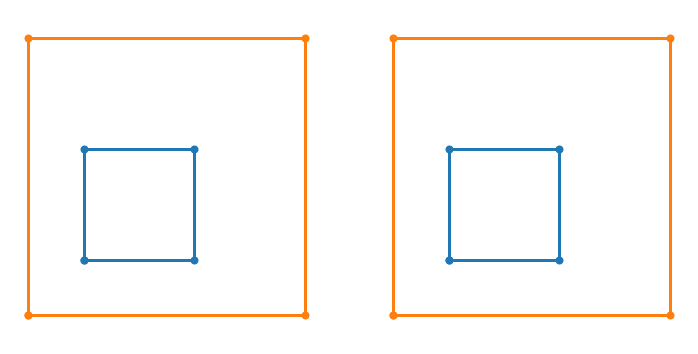

In [70]:
plt.figure(figsize=(6,3))    
for x,y,t in test:
    plt.subplot(1,2,1)
    plt.plot(x, y, marker='.')
    plt.axis('off')

    plt.gca().invert_yaxis()
    plt.axis('equal')

for x,y in s_test:
    plt.subplot(1,2,2)
    plt.plot(x, y, marker='.')
    plt.axis('off')

    plt.gca().invert_yaxis()
    plt.axis('equal')
    
plt.show() 